In [62]:
#Project Planning Overview

""" Workflow Stages
1. Problem Understanding | Question or problem definition.
2. Data Collection | Acquire training and testing data.
3. Data Cleaning and Harmonization | Wrangle, prepare, cleanse the data. | Add all iterations here. Note which.
4. Data Exploration | Analyze, identify patterns, and explore the data.  | Add all iterations here. Note which.
5. Data Model Building | Model, predict and solve the problem.
6. Data Model Validation and Reporting | Visualize, report, and present the problem solving steps and final solution.
7. Solution Submission | Supply or submit the results.

"""

""" Workflow Goals: Follow 7 C's 
- Classifying 
- Correlating
- Converting 
- Completing
- Correcting 
- Creating 
- Charting
"""

" Workflow Goals: Follow 7 C's \n- Classifying \n- Correlating\n- Converting \n- Completing\n- Correcting \n- Creating \n- Charting\n"

In [63]:
#References:
 #   https://www.kaggle.com/startupsci/titanic-data-science-solutions
 #   https://www.kaggle.com/miguelquiceno/titanic-eda/execution
 #   https://www.youtube.com/watch?v=I3FBJdiExcg&t=371s

In [65]:
#1. Problem Understanding | Question or problem definition.

In [66]:
"""Problem Statement   
In this challenge, we ask you to build a predictive model that answers the question: 
“what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, 
socio-economic class, etc).

Problem Interpretation: Can we develop an 'explainable' predictive model that predicts which passenger survives
given their personal log records data? Explainable, in this context, refers to the use of a type of model that 
can reliably associate the predictive power/assocaition with the original or engineered features from the 
passenger data set.

Domain Knowledge
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding 
with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502
out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to
survive than others.
"""

"Problem Statement   \nIn this challenge, we ask you to build a predictive model that answers the question: \n“what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, \nsocio-economic class, etc).\n\nProblem Interpretation: Can we develop an 'explainable' predictive model that predicts which passenger survives\ngiven their personal log records data? Explainable, in this context, refers to the use of a type of model that \ncan reliably associate the predictive power/assocaition with the original or engineered features from the \npassenger data set.\n\nDomain Knowledge\nThe sinking of the Titanic is one of the most infamous shipwrecks in history.\n\nOn April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding \nwith an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502\nout of 2224 passengers and crew.\n\nWhile there was some element of luck 

In [77]:
#data wrangling
import pandas as pd
import numpy as np
import re
import time, datetime  

#visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

#data scaler
from sklearn.preprocessing import StandardScaler as sclr

#machine learning
from sklearn.linear_model import LogisticRegression as logr
from sklearn import tree
from sklearn.naive_bayes import GaussianNB as gnb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#ml ensembles
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

#model tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#model scoring
from sklearn.model_selection import cross_val_score as cv_score

In [68]:
#2. Data Collection | Acquire training and testing data.

In [83]:
#read in training and test sets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

#1st look at data
train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [79]:
#identify all training set columns
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [80]:
#identify all test set columns
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')

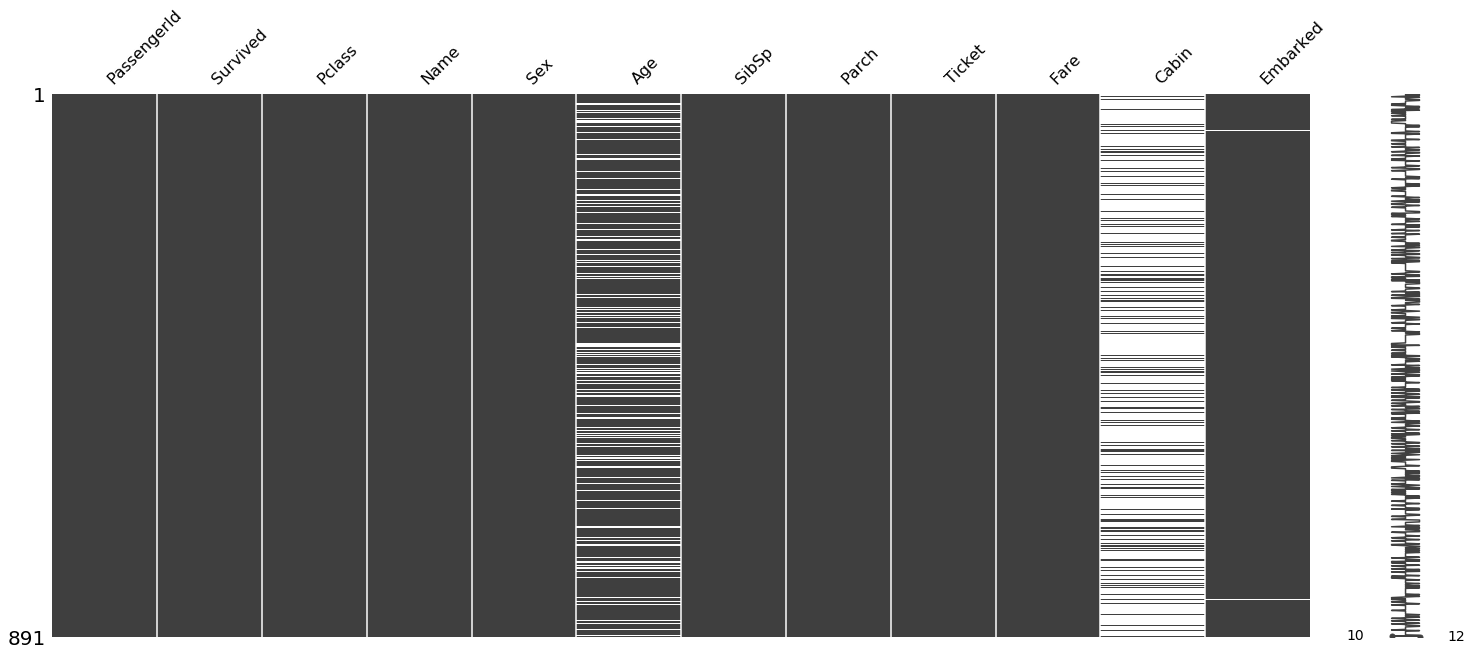

In [81]:
#visualize missing values as a matrix 
msno.matrix(train)

#'Age', 'Cabin', and 'Embarked' have missing values
#missing values appear randomly dispersed throughout the dataset

In [82]:
#check training set for null values and mismatched data types
train.info()

#~20% of 'Age' and ~80% of 'Cabin' are missing values | 'Cabin' seems to have too few to use, 'Age' appears useable
#only 2 records have missing 'Embarked' entry which is negligible

#we expected 891 entries and recieved 891 entries, so we can conclude the import did not lead to present nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [84]:
#check test set for null values and mismatched data types
test.info()

#~20% of 'Age' and ~80% of 'Cabin' are missing values. Consistent with traing set.
#only 1 record for Fare is missing

#we expected 891 entries and recieved 891 entries, so we can conclude the import did not lead to present nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [71]:
#3. Data Preprocessing | Wrangle, prepare, feature engineer, cleanse the data.

In [75]:
# Data Categorization - we can look at the df index, head() and data dictionary to classify data

"""
Variables: Categorical 
- Factor | str
Pclass, Name, Ticket, Cabin, Embarked

- Factor | discrete numeric
PassengerID, Pclass

- Binary | discrete numeric and str
Survived, set_type, and Sex 

Variables: Continuous & Discrete | numeric 
- Age, Fare, Parch, SibSp
"""

'\nVariables: Categorical \n- Factor | str\nPclass, Name, Ticket, Cabin, Embarked\n\n- Factor | numeric\nPassengerID, Pclass\n\n- Binary | numeric and str\nSurvived, set_type, and Sex \n\nVariables: Continuous |Numeric \n- Age, Fare, Parch, SibSp\n'

In [76]:
#3.1 Feature Engineering

In [85]:
#New feature: add a title feature to track correlation of surival with passenger title
train['title'] = train['Name'].apply(lambda x: x.split(', ')[1].split('.')[0])
test['title'] = test['Name'].apply(lambda x: x.split(', ')[1].split('.')[0])
test['title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Ms          1
Dona        1
Dr          1
Name: title, dtype: int64

In [86]:
#Personal Curiosity: Let's peak at the survival of the ship's Captain and a Countess!
train[train['Name'].str.contains(r'C[ao][pu][tn]',regex=True)][2:] #The Royal surives while the Captain goes down with his ship.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0,B22,S,Capt
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5,B77,S,the Countess


In [88]:
#New feature: Cabin letter - see if a passengers cabin section correlates with survival
train['Cabin_letter'] = train.Cabin.apply(lambda x: 0 if pd.isna(x) else x[0])
test['Cabin_letter'] = test.Cabin.apply(lambda x: 0 if pd.isna(x) else x[0]) 
test.Cabin_letter.value_counts()

0    327
C     35
B     18
D     13
E      9
F      8
A      7
G      1
Name: Cabin_letter, dtype: int64

In [89]:
#3.2 Data Cleaning and Harmonization

In [90]:
#Data Correction
    #drop embarked nulls since there are only 2
train.dropna(subset=['Embarked'], inplace=True)
test.dropna(subset=['Embarked'], inplace=True)

#Data Completion
    #impute Age value for models can't handle Nulls | used the mode in this case 4 minus the median = 24.
train['Age'] = train['Age'].fillna(value=(train['Age'].median()-4))
test['Age'] = test['Age'].fillna(value=(train['Age'].median()-4))

#Data Convertion
    #normalize Fare feature using a log transformation since it is exponential
train['Fare_norm'] = np.log(train.Fare-1) #include -1 to address -inf for zero dollar Fares
train['Fare_norm'] = train['Fare_norm'].fillna(value=1) #fix zero Fares not correctly scaled to 1
test['Fare_norm'] = np.log(test.Fare-1)
test['Fare_norm'] = test['Fare_norm'].fillna(value=1)

    #convert factors to numeric type | aka create dummy variables 
train_dum = pd.get_dummies(train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked', 'Fare_norm', 'title', 'Cabin_letter']])
test_dum = pd.get_dummies(test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked', 'Fare_norm', 'title', 'Cabin_letter']])

    #drop Cabin column 
train.drop(columns='Cabin',inplace=True)

C:\Users\cumea\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


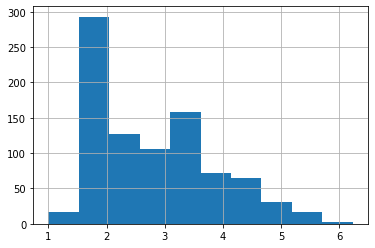

In [91]:
#check 'Fare' feature normalized with histogram
train.Fare_norm.hist()

In [93]:
#partition x, y training and test sets
x_train = train_dum
y_train = train['Survived']
x_test = test_dum

In [98]:
#add missing columns from test set that is in training set and vice-versa
x_test['title_Capt'] = 0 
x_test['title_Lady'] = 0 
x_test['title_Major'] = 0 
x_test['title_Jonkheer'] = 0 
x_test['title_Mlle'] = 0 
x_test['title_Mme'] = 0 
x_test['title_Sir'] = 0 
x_test['title_the Countess'] = 0 
x_test['Cabin_letter_T'] = 0 
x_test['title_Don']=0
x_train['title_Dona']=0

#rearrange dataframe columns to match
x_test = x_test[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare_norm', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'title_Capt',
       'title_Col', 'title_Don', 'title_Dr', 'title_Jonkheer', 'title_Lady',
       'title_Major', 'title_Master', 'title_Miss', 'title_Mlle', 'title_Mme',
       'title_Mr', 'title_Mrs', 'title_Ms', 'title_Rev', 'title_Sir',
       'title_the Countess', 'Cabin_letter_0', 'Cabin_letter_A',
       'Cabin_letter_B', 'Cabin_letter_C', 'Cabin_letter_D', 'Cabin_letter_E',
       'Cabin_letter_F', 'Cabin_letter_G', 'Cabin_letter_T', 'title_Dona']]

#check order matches
x_train.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare_norm', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'title_Capt',
       'title_Col', 'title_Don', 'title_Dr', 'title_Jonkheer', 'title_Lady',
       'title_Major', 'title_Master', 'title_Miss', 'title_Mlle', 'title_Mme',
       'title_Mr', 'title_Mrs', 'title_Ms', 'title_Rev', 'title_Sir',
       'title_the Countess', 'Cabin_letter_0', 'Cabin_letter_A',
       'Cabin_letter_B', 'Cabin_letter_C', 'Cabin_letter_D', 'Cabin_letter_E',
       'Cabin_letter_F', 'Cabin_letter_G', 'Cabin_letter_T', 'title_Dona'],
      dtype='object')

In [97]:
x_test.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare_norm', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'title_Capt',
       'title_Col', 'title_Don', 'title_Dr', 'title_Jonkheer', 'title_Lady',
       'title_Major', 'title_Master', 'title_Miss', 'title_Mlle', 'title_Mme',
       'title_Mr', 'title_Mrs', 'title_Ms', 'title_Rev', 'title_Sir',
       'title_the Countess', 'Cabin_letter_0', 'Cabin_letter_A',
       'Cabin_letter_B', 'Cabin_letter_C', 'Cabin_letter_D', 'Cabin_letter_E',
       'Cabin_letter_F', 'Cabin_letter_G', 'Cabin_letter_T', 'title_Dona'],
      dtype='object')

In [99]:
#Data Conversion | Harmonize the scale of all data
scale = sclr()
x_train_scl = x_train.copy() # copy dummy df to leave it intact after scaling for performance comparison
x_test_scl = x_test.copy()

#scale appropriate variables within the train and test sets
x_train_scl[['Age','SibSp','Parch','Fare_norm']]=scale.fit_transform(x_train_scl[['Age','SibSp','Parch','Fare_norm']])
x_test_scl[['Age','SibSp','Parch','Fare_norm']]=scale.fit_transform(x_test_scl[['Age','SibSp','Parch','Fare_norm']])

In [101]:
#4. Data Exploration | Analyze, identify patterns, and explore the data.

In [102]:
#check the central tendency and dispersion of our numeric features
train.describe()

#Some columns are not relavant; PassengerId, set_type

#Survived: over 60% of passengers did not survive
#Pclass: Over 75% of the passengers were in the lower classes (2 and 3)
#Age: the average passenger was 29, but with a 14 year std this could mean more older or more younger people were present 
# -looking at percentiles, we better see 50% of passengers were under 28, 25% between 28 and 38, and 25% older than 38
#SibSp: 50% of passengers had no sibling or spouse, 25% had 1, and 25% had 1 or more
#parch: 75% of passengers did not travel with a parent or child. Does not include nannies traveling with children
#Fare: average fare was $32, while 75% of passengers paid less than $32. This is possibly high skew from large fares like $512. 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Fare_norm
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,28.518751,0.524184,0.382452,32.096681,2.831313
std,256.998173,0.486260,0.834700,13.162820,1.103705,0.806761,49.697504,1.003264
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,1.930913
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200,2.599291
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,3.401197
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,6.237014


In [103]:
#Exploring Continuous Variables

In [104]:
#1st by Histograms

#here we check out the frequency of continuous and discrete numeric variables

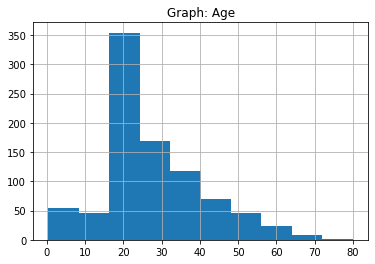

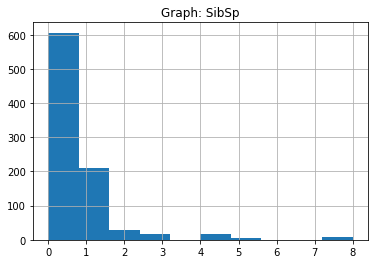

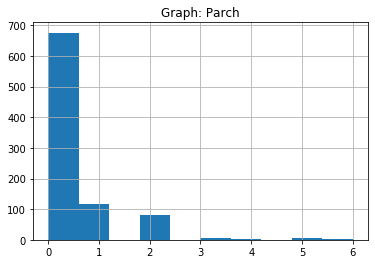

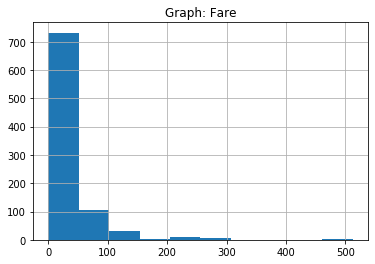

In [105]:
hist_col = ['Age','SibSp','Parch','Fare'] 

for e in hist_col:
    train[e].hist()
    plt.title('Graph: %s' % e) 
    plt.show()

In [106]:
#Bar Plot Review

#'Age' - more normally distributed with most between 16 and 38 | we need to select appropriate bin (current = 5)
#'SibSp' - vast majority have 0 or 1 | small range, likely not need to normalize
#'Parch' - vast majority have 0 or 1 | small range, likely not need to normalize
#'Fare' - vast majority paid less than $100 | likely need to normalize

In [108]:
#2nd by Box Plot

#Here we check out the numeric fields that have interesting percentile values

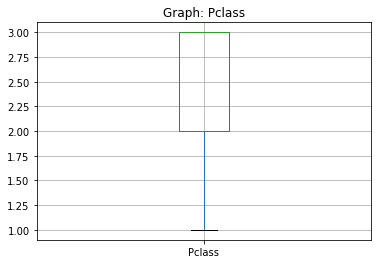

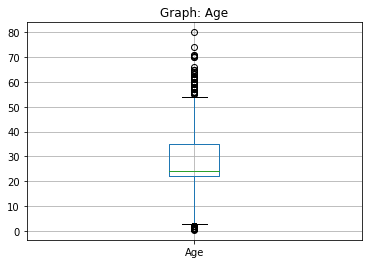

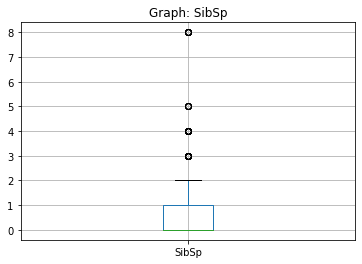

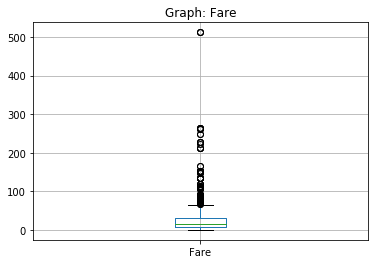

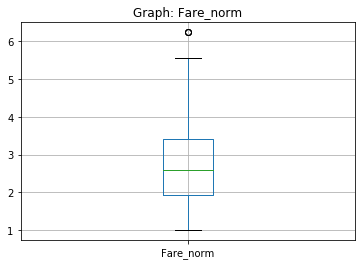

In [123]:
box_col =['Pclass', 'Age','SibSp', 'Fare','Fare_norm'] #normalized 'Fare' seems to re-include most of the outliers
for e in box_col:
    train.boxplot(column = e)
    plt.title('Graph: %s' % e)
    plt.show()

In [110]:
#Boxplot Review

#'Pclass' - Most dispersion in class 2 and 3
#'Age' - dispersion is so low in age that passengers over 65 are outliers
#'SibSp' - 5 to 8 Siblings/Spouses are considered outliers
#'Fare' - Vast majority of fares are less than $50

train[train['SibSp'] >= 5] #Only two familes appear to have 5 or more siblings/spouses. And none of them survived. Tragic.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,title,Cabin_letter,Fare_norm
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.90,S,Master,0,3.826465
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.90,S,Miss,0,3.826465
159,160,0,3,"Sage, Master. Thomas Henry",male,24.0,8,2,CA. 2343,69.55,S,Master,0,4.227563
180,181,0,3,"Sage, Miss. Constance Gladys",female,24.0,8,2,CA. 2343,69.55,S,Miss,0,4.227563
201,202,0,3,"Sage, Mr. Frederick",male,24.0,8,2,CA. 2343,69.55,S,Mr,0,4.227563
324,325,0,3,"Sage, Mr. George John Jr",male,24.0,8,2,CA. 2343,69.55,S,Mr,0,4.227563
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.90,S,Master,0,3.826465
480,481,0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.90,S,Master,0,3.826465
683,684,0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.90,S,Mr,0,3.826465
792,793,0,3,"Sage, Miss. Stella Anna",female,24.0,8,2,CA. 2343,69.55,S,Miss,0,4.227563


In [111]:
train[train['Fare'] >= 270] #Only 3 passengers paid tickets over $270. Outliers, but notice they all survived.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,title,Cabin_letter,Fare_norm
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C,Miss,0,6.237014
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C,Mr,B,6.237014
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C,Mr,B,6.237014


In [112]:
#3rd by Correlation Matrix

In [115]:
corr = train.corr()
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Fare_norm
PassengerId,1.000000,-0.005028,-0.035330,0.033351,-0.057686,-0.001657,0.012703,-0.002226
Survived,-0.005028,1.000000,-0.335549,-0.057833,-0.034040,0.083151,0.255290,0.332563
Pclass,-0.035330,-0.335549,1.000000,-0.352812,0.081656,0.016824,-0.548193,-0.711755
Age,0.033351,-0.057833,-0.352812,1.000000,-0.231639,-0.154027,0.104553,0.132915
SibSp,-0.057686,-0.034040,0.081656,-0.231639,1.000000,0.414542,0.160887,0.335169
Parch,-0.001657,0.083151,0.016824,-0.154027,0.414542,1.000000,0.217532,0.349417
Fare,0.012703,0.255290,-0.548193,0.104553,0.160887,0.217532,1.000000,0.801960
Fare_norm,-0.002226,0.332563,-0.711755,0.132915,0.335169,0.349417,0.801960,1.000000


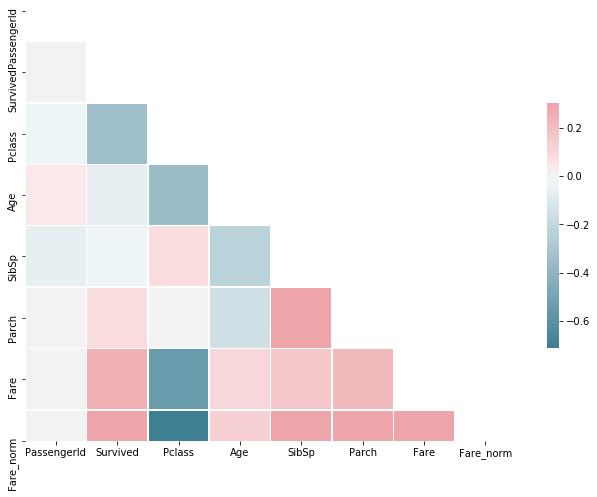

In [116]:
#generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

#set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

#generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}

In [126]:
#Correlation Matrix Review

#Note: the target variable is 'Survived'
#'Pclass' and 'Fare_norm' have the highest correlation with 'Survived' at -33.8% and 33.3% respectively.
#multicollinearity watch: 
# - 'Pclass' with 'Age' and 'Pclass' with 'Fare_norm' (makes sense if higher class tickets have higher fare cost)
# - Our engineered 'Fare_norm' more correlated with 'Survived' and highly correlated with 'Pclass'
# - 'SibSp' with 'Age' and SibSp with 'Parch' 

#now let's drop the 'Fare' as we will use the 'Fare_norm'
train.drop(columns='Fare',inplace=True)
test.drop(columns='Fare',inplace=True)

In [119]:
#Exploring Categorical Variables

In [120]:
#1st by Barplot

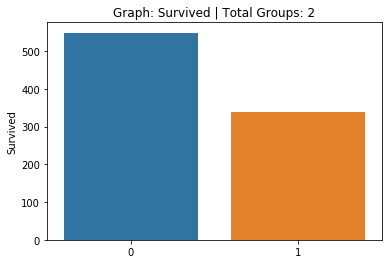

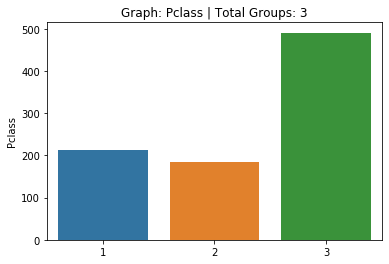

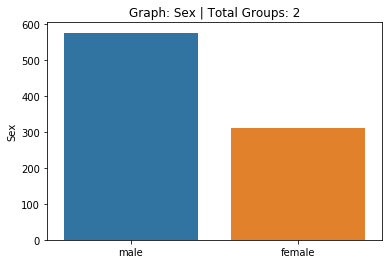

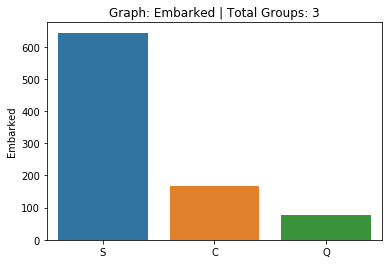

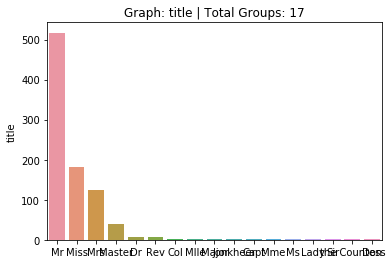

In [122]:
#build bar plots for each cat feature
bar_col1 = train[['Survived', 'Pclass', 'Sex', 'Embarked','title']] 

for e in bar_col1:
    col_val = bar_col1[e].value_counts()
    plt.title('Graph: %s | Total Groups: %d' % (e,len(col_val)))
    plot = sns.barplot(x=col_val.index, y=col_val)
    plot.set_xticklabels(plot.get_xticklabels())
    plt.show()

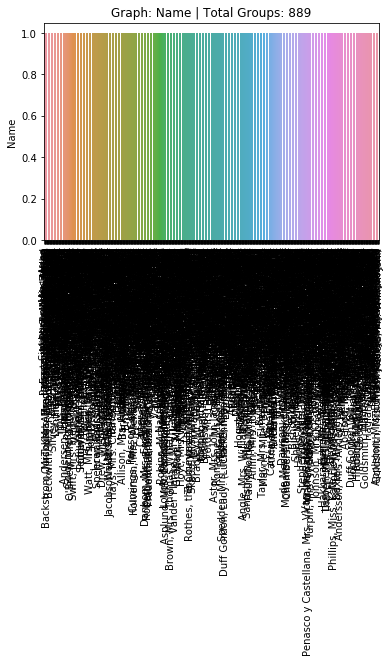

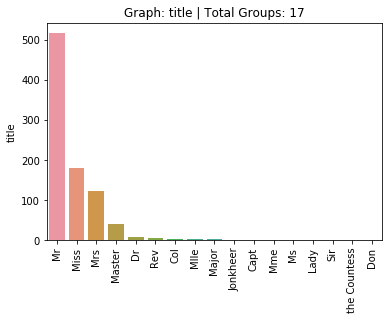

In [125]:
#Plots with vertical x labels
bar_col2 = train[['Name', 'title']] #'Name' feature values are too distinct and will be excluded

for e in bar_col2:
    col_val = bar_col2[e].value_counts()
    plt.title('Graph: %s | Total Groups: %d' % (e,len(col_val)))
    plot = sns.barplot(x=col_val.index, y=col_val)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
    plt.show()

In [127]:
#Barplot Review

#Survived - majority did not survive | binary 
#Pclass - majority of passengers 3rd, then sharp drop to 1st, followed closely by 2nd

#now let's drop the 'Name' column 
train.drop(columns='Name',inplace=True)
test.drop(columns='Name',inplace=True)

In [131]:
#Explore variable relationships with passenger survival by Pivot Table
pivot_col = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Embarked', 'Fare_norm', 'title']
for e in pivot_col:
    ptab=pd.pivot_table(train, index = e, values='Survived')
    print(ptab)

        Survived
Pclass          
1       0.626168
2       0.472826
3       0.242363
        Survived
Sex             
female  0.740385
male    0.188908
       Survived
SibSp          
0      0.343234
1      0.535885
2      0.464286
3      0.250000
4      0.166667
5      0.000000
8      0.000000
       Survived
Parch          
0      0.341716
1      0.550847
2      0.500000
3      0.600000
4      0.000000
5      0.200000
6      0.000000
             Survived
Ticket               
110152       1.000000
110413       0.666667
110465       0.000000
110564       1.000000
110813       1.000000
...               ...
W./C. 6608   0.000000
W./C. 6609   0.000000
W.E.P. 5734  0.000000
W/C 14208    0.000000
WE/P 5735    0.500000

[680 rows x 1 columns]
          Survived
Embarked          
C         0.553571
Q         0.389610
S         0.336957
           Survived
Fare_norm          
1.000000   0.066667
1.102770   0.000000
1.386294   0.000000
1.655844   0.000000
1.693319   0.000000
...           

In [132]:
#Pivot Review

#Survival by
#'Class: 60% of 1st class survived, just of 50% of 2nd class, and only just over 20% of 3rd class. Note: The majority of passengers were in 3rd class. Tragic.
#'Sex': Over74% of females survived while only 18.9% of males survived.
#'SibSp': Passengers with 1 Sibling/Spouse had the highest proportion og survival. Passengers who had more 5 or more Sib/Sp did not survive
#'Parch': Passengers with 3 Parents or Children had the highest proportion of survival
#'Fare_norm': Passengers who paid higher Fare's had a higher proporiton of surival
#'Embarked': Over 55% of passgeners who embarked from Cherbourg survived.
#'title': very telling on survival. All young, unmarried women (with high status) survived ('Ms'/1.0) while very few 'average' men proportionately survived ('Mr'/0.16). and other insights. 

In [135]:
#Let's compare the average values for our continuous variables along Survivorship
pd.pivot_table(train, index='Survived', values=['Pclass', 'SibSp', 'Parch', 'Fare_norm'])

,Fare_norm,Parch,Pclass,SibSp
Survived,,,,
0,2.568893,0.329690,2.531876,0.553734
1,3.255045,0.467647,1.955882,0.476471


In [137]:
#Let's use pivots to drill-down and count the number of survivors by interesting subcategories
piv_col1 = ['Pclass', 'SibSp', 'Sex', 'Parch', 'Embarked','title']
for e in piv_col1:
    dd_pivot = pd.pivot_table(train, index='Survived', columns=e, values='PassengerId', aggfunc='count')
    print(dd_pivot)
    print('\n')


Pclass      1   2    3
Survived              
0          80  97  372
1         134  87  119


SibSp         0      1     2     3     4    5    8
Survived                                          
0         398.0   97.0  15.0  12.0  15.0  5.0  7.0
1         208.0  112.0  13.0   4.0   3.0  NaN  NaN


Sex       female  male
Survived              
0             81   468
1            231   109


Parch         0     1     2    3    4    5    6
Survived                                       
0         445.0  53.0  40.0  2.0  4.0  4.0  1.0
1         231.0  65.0  40.0  3.0  NaN  1.0  NaN


Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


title     Capt  Col  Don   Dr  Jonkheer  Lady  Major  Master   Miss  Mlle  \
Survived                                                                    
0          1.0  1.0  1.0  4.0       1.0   NaN    1.0    17.0   55.0   NaN   
1          NaN  1.0  NaN  3.0       NaN   1.0    1.0    23.0  126.0   2.0   

title     Mme

In [139]:
#5. Data Model Building | Model, predict and solve the problem.

In [140]:
#1st Iteration: Build of Plausible Models on Default Setting

In [142]:
#Results: Format is (Scaled Score | Unscaled Score)

"""
Should Scale
- Logistic Regression (82.6% | 82.5%)
- K-Nearest Neighbors (82.5% | 81.1%)
- Support Vector Classifier (83.1% | 82.2%)
- Soft Vote Classifier (83.7% | 84.03%)
- Hard Vote Classifier (84.1% | 83.6%)  #Best Ensembler

Should not Scale
- Naive Bayes (72.1% | 73.8%)
- Classification Tree (78.6% | 78.6%)
- Random Forest (81.2% | 81.3%)
- AdaBoost Classifier (82.0% | 82.0%)
- Gradient Descent Classifier (82.7% | 82.7%)     
- XGBoost Classifier (82.9% | 82.9%)              

"""

'\nResults: Format is (Scaled Score | Unscaled Score)\n\nShould Scale\n- Logistic Regression (82.6% | 82.5%)\n- K-Nearest Neighbors (82.5% | 81.1%)\n- Support Vector Classifier (83.1% | 82.2%)\n- Soft Vote Classifier (83.7% | 84.03%)\n- Hard Vote Classifier (84.1% | 83.6%)  #Best Ensembler\n\nShould not Scale\n- Naive Bayes (72.1% | 73.8%)\n- Classification Tree (78.6% | 78.6%)\n- Random Forest (81.2% | 81.3%)\n- AdaBoost Classifier (82.0% | 82.0%)\n- Gradient Descent Classifier (82.7% | 82.7%)     \n- XGBoost Classifier (82.9% | 82.9%)              \n\n'

In [144]:
#Run baseline models | Model 1

#Gaussian Naive Bayes 
start_time = time.time()

#Gaussian Naive Bayes is generally used as a good baseline model for classification problems with continuous variables
nb = gnb()
score_nb = cv_score(nb,x_train_scl,y_train,cv=10)

run_time = (time.time() - start_time)

print(score_nb.round(2)*100) #print 5 cross validation scores
print("Naive Bayes Accuracy: %s" % round(score_nb.mean()*100,2)+'%') #print the average score
print("Run time: %s" % datetime.timedelta(seconds=run_time))


[63. 66. 67. 74. 80. 74. 78. 70. 74. 75.]
Naive Bayes Accuracy: 72.11%
Run time: 0:00:00.079317


In [145]:
#Re-Run baseline models | Model 1

#we re-run our model on the unscaled training set to compare performance
start_time = time.time()

nb = gnb()
score_nb_unscl = cv_score(nb,x_train,y_train,cv=10)

run_time = (time.time() - start_time)

print(score_nb_unscl.round(2)*100) #print 5 cross validation scores
print("Unscaled Naive Bayes Accuracy: %s" % round(score_nb_unscl.mean()*100,2)+'%') #print the average score
print("Run time: %s" % datetime.timedelta(seconds=run_time))

#the unscaled training set accuracy outperforms the scaled set 

[66. 71. 72. 76. 80. 74. 81. 70. 74. 74.]
Unscaled Naive Bayes Accuracy: 73.79%
Run time: 0:00:00.114928


In [146]:
#Run baseline models | Model 2

#Decision ('Classification') Tree

start_time = time.time()

#as we will incorporate more robust tree based models, this standard tree serves as a baseline model
dt = tree.DecisionTreeClassifier(random_state=0)
score_dt = cv_score(dt, x_train_scl, y_train,cv=10)

run_time = (time.time() - start_time)

print(score_dt.round(2)*100) #print 10 cross validation scores
print("Classification Tree Accuracy: %s" % round(score_dt.mean()*100,2)+'%') #print the average score
print("Run time: %s" % datetime.timedelta(seconds=run_time))

[76. 84. 72. 81. 83. 82. 78. 75. 84. 78.]
Classification Tree Accuracy: 79.41%
Run time: 0:00:00.477782


In [148]:
#Re-run baseline models | Model 2

#we run the Decision ('Classification') Tree on the unscaled training set

start_time = time.time()

dt = tree.DecisionTreeClassifier(random_state=0)
score_dt_unscl = cv_score(dt, x_train, y_train,cv=10)

run_time = (time.time() - start_time)

print(score_dt_unscl.round(2)*100) 
print("Classification Tree Accuracy: %s" % round(score_dt_unscl.mean()*100,2)+'%') 
print("Run time: %s" % datetime.timedelta(seconds=run_time))

#the unscaled training set accuracy approximately matches the scaled set, with a faster run time

[75. 84. 72. 81. 83. 82. 78. 75. 84. 80.]
Classification Tree Accuracy: 79.42%
Run time: 0:00:00.116701


In [149]:
#Repeat for remaining models with parameters set to default

In [150]:
#Logistic Regression

start_time = time.time()

lr = logr(solver='liblinear')
score_lr = cv_score(lr, x_train_scl, y_train,cv=10)

run_time = (time.time() - start_time)

print(score_lr.round(2)*100) #again, print 10 cross validation scores
print("Logistic Regression Accuracy: %s" % round(score_lr.mean()*100,2)) #again, print the average score
print("Run time: %s" % datetime.timedelta(seconds=run_time))

[79. 83. 78. 88. 83. 78. 81. 83. 88. 86.]
Logistic Regression Accuracy: 82.57
Run time: 0:00:00.368650


In [151]:
#Logistic Regression (Unscaled)

start_time = time.time()

lr = logr(solver='liblinear')
score_lr_unscl = cv_score(lr, x_train, y_train,cv=10)

run_time = (time.time() - start_time)

print(score_lr_unscl.round(2)*100) 
print("Logistic Regression Accuracy: %s" % round(score_lr_unscl.mean()*100,2)) 
print("Run time: %s" % datetime.timedelta(seconds=run_time))

#the scaled training set accuracy outperforms the unscaled set 

[79. 83. 78. 87. 83. 78. 82. 82. 88. 86.]
Logistic Regression Accuracy: 82.46
Run time: 0:00:00.144000


In [152]:
#Random Forests

start_time = time.time()

rf = RandomForestClassifier(random_state=0, n_estimators=100)
score_rf = cv_score(rf, x_train_scl, y_train,cv=10)

run_time = (time.time() - start_time)

print(score_rf.round(2)*100) 
print("Random Forest Accuracy: %s" % round(score_rf.mean()*100,2)) 
print("Run time: %s" % datetime.timedelta(seconds=run_time))

[79. 89. 75. 83. 83. 85. 79. 75. 85. 84.]
Random Forest Accuracy: 81.78
Run time: 0:00:03.037220


In [153]:
#Random Forests (Unscaled)

start_time = time.time()

rf = RandomForestClassifier(random_state=0, n_estimators=100)
score_rf_unscl = cv_score(rf, x_train, y_train,cv=10)

run_time = (time.time() - start_time)

print(score_rf_unscl.round(2)*100) 
print("Unscaled Random Forest Accuracy: %s" % round(score_rf_unscl.mean()*100,2)) 
print("Run time: %s" % datetime.timedelta(seconds=run_time))

#The unscaled training set accuracy outperforms the scaled set 

[76. 89. 75. 83. 84. 87. 79. 75. 87. 84.]
Unscaled Random Forest Accuracy: 81.89
Run time: 0:00:03.130086


In [154]:
#K-Nearest Neighbors 

start_time = time.time()

kn = KNeighborsClassifier(n_neighbors=5)
score_knn = cv_score(kn, x_train_scl, y_train,cv=10)

run_time = (time.time() - start_time)

print(score_knn.round(2)*100) 
print("K-Nearest Neighbor Accuracy: %s" % round(score_knn.mean()*100,2)) 
print("Run time: %s" % datetime.timedelta(seconds=run_time))

[79. 85. 75. 85. 84. 82. 84. 78. 89. 83.]
K-Nearest Neighbor Accuracy: 82.45
Run time: 0:00:00.627685


In [155]:
#K-Nearest Neighbors (Unscaled)

start_time = time.time()

kn = KNeighborsClassifier(n_neighbors=5)
score_knn_unscl = cv_score(kn, x_train, y_train,cv=10)

run_time = (time.time() - start_time)

print(score_knn_unscl.round(2)*100) 
print("Unscaled K-Nearest Neighbor Accuracy: %s" % round(score_knn_unscl.mean()*100,2)) 
print("Run time: %s" % datetime.timedelta(seconds=run_time))

#The scaled training set accuracy outperforms the unscaled set | 82.45 > 81.11

[71. 81. 79. 84. 84. 75. 84. 80. 88. 85.]
Unscaled K-Nearest Neighbor Accuracy: 81.11
Run time: 0:00:00.255747


In [156]:
#Support Vector Classification

start_time = time.time()

svc = SVC(gamma='auto',probability=True)
score_svc = cv_score(svc, x_train_scl, y_train,cv=10)

run_time = (time.time() - start_time)

print(score_svc.round(2)*100) 
print("Support Vector Accuracy: %s" % round(score_svc.mean()*100,2)) 
print("Run time: %s" % datetime.timedelta(seconds=run_time))

[83. 87. 78. 88. 83. 81. 81. 79. 88. 85.]
Support Vector Accuracy: 83.13
Run time: 0:00:02.892964


In [157]:
#Support Vector Classification (Unscaled)

start_time = time.time()

svc = SVC(gamma='auto',probability=True)
score_svc_unscl = cv_score(svc, x_train, y_train,cv=10)

run_time = (time.time() - start_time)

print(score_svc_unscl.round(2)*100) 
print("Unscaled Support Vector Accuracy: %s" % round(score_svc_unscl.mean()*100,2)) 
print("Run time: %s" % datetime.timedelta(seconds=run_time))

#The scaled training set accuracy outperforms the unscaled set | 83.13 > 82.23

[80. 88. 75. 89. 83. 75. 81. 80. 87. 85.]
Unscaled Support Vector Accuracy: 82.23
Run time: 0:00:03.350523


In [163]:
#AdaBoost Classifier

start_time = time.time()

ada = AdaBoostClassifier()
score_ada = cv_score(ada, x_train_scl, y_train,cv=10)

run_time = (time.time() - start_time)

print(score_ada.round(2)*100) 
print("AdaBoost Accuracy: %s" % round(score_ada.mean()*100,2)) 
print("Run time: %s" % datetime.timedelta(seconds=run_time))

[78. 82. 79. 82. 83. 80. 85. 84. 84. 83.]
AdaBoost Accuracy: 82.0
Run time: 0:00:02.099777


In [164]:
#AdaBoost Classifier (Unscaled)

start_time = time.time()

ada = AdaBoostClassifier()
score_ada_unscl = cv_score(ada, x_train, y_train,cv=10)

run_time = (time.time() - start_time)

print(score_ada_unscl.round(2)*100) 
print("Unscaled AdaBoost Accuracy: %s" % round(score_ada_unscl.mean()*100,2))
print("Run time: %s" % datetime.timedelta(seconds=run_time))

#The scaled training set accuracy matches the unscaled set | 82.0 = 82.0, while the unscaled set runs faster

[78. 82. 79. 82. 83. 80. 85. 84. 84. 83.]
Unscaled AdaBoost Accuracy: 82.0
Run time: 0:00:01.832638


In [165]:
#Gradient Boost Classifier

start_time = time.time()

gb = GradientBoostingClassifier(random_state=0)
score_gb = cv_score(gb, x_train_scl, y_train,cv=10)

run_time = (time.time() - start_time)

print(score_gb.round(2)*100) 
print("Gradient Boost Accuracy: %s" % round(score_gb.mean()*100,2)) 
print("Run time: %s" % datetime.timedelta(seconds=run_time))

[78. 84. 74. 84. 88. 84. 81. 80. 91. 84.]
Gradient Boost Accuracy: 82.79
Run time: 0:00:03.298825


In [166]:
#Gradient Boost Classifier (Unscaled)

start_time = time.time()

gb = GradientBoostingClassifier(random_state=0)
score_gb_unscl = cv_score(gb, x_train, y_train,cv=10)

run_time = (time.time() - start_time)

print(score_gb_unscl.round(2)*100) 
print("Unscaled Gradient Boost Accuracy: %s" % round(score_gb_unscl.mean()*100,2)) 
print("Run time: %s" % datetime.timedelta(seconds=run_time))

#The scaled training set accuracy matches unscaled set | 82.68 = 82.68, and is slightly faster

[78. 84. 74. 84. 88. 84. 81. 80. 91. 84.]
Unscaled Gradient Boost Accuracy: 82.79
Run time: 0:00:02.812150


In [167]:
#XGBoost Classifier

start_time = time.time()

xgb = XGBClassifier(random_state=0)
score_xgb = cv_score(xgb, x_train_scl, y_train,cv=10)

run_time = (time.time() - start_time)

print(score_xgb.round(2)*100) 
print("XGBoost Accuracy: %s" % round(score_xgb.mean()*100,2)) 
print("Run time: %s" % datetime.timedelta(seconds=run_time))

[75. 82. 75. 87. 88. 84. 83. 82. 90. 83.]
XGBoost Accuracy: 82.9
Run time: 0:00:03.057762


In [168]:
#XGBoost Classifier (Unscaled)

start_time = time.time()

xgb = XGBClassifier(random_state=0)
score_xgb_unscl = cv_score(xgb, x_train, y_train,cv=10)

run_time = (time.time() - start_time)

print(score_xgb_unscl.round(2)*100) 
print("Unscaled XGBoost Accuracy: %s" % round(score_xgb_unscl.mean()*100,2)) 
print("Run time: %s" % datetime.timedelta(seconds=run_time))

#The unscaled training set accuracy matches the scaled set | 82.9 = 82.9, while running a little faster

[75. 82. 75. 87. 88. 84. 83. 82. 90. 83.]
Unscaled XGBoost Accuracy: 82.9
Run time: 0:00:02.630654


In [169]:
#Soft Voting Classifier

start_time = time.time()

soft_vote = VotingClassifier(estimators=[('xgb',xgb), ('gb',gb), ('ada',ada), ('rf',rf),('svc',svc), ('kn',kn), ('lr',lr)], voting='soft')
score_vote = cv_score(soft_vote, x_train_scl, y_train,cv=10)

run_time = (time.time() - start_time)

print(score_vote.round(2)*100) 
print("Voting Classifier Accuracy: %s" % round(score_vote.mean()*100,2)) 
print("Run time: %s" % datetime.timedelta(seconds=run_time))

[82. 88. 74. 89. 85. 84. 83. 76. 90. 83.]
Voting Classifier Accuracy: 83.46
Run time: 0:00:13.649837


In [170]:
#Soft Voting Classifier (Unscaled)

start_time = time.time()

soft_vote = VotingClassifier(estimators=[('xgb',xgb), ('gb',gb), ('ada',ada), ('rf',rf),('svc',svc), ('kn',kn), ('lr',lr)], voting='soft')
score_vote_unscl = cv_score(soft_vote, x_train, y_train,cv=10)

run_time = (time.time() - start_time)

print(score_vote_unscl.round(2)*100) 
print("Unscaled Voting Classifier Accuracy: %s" % round(score_vote_unscl.mean()*100,2)) 
print("Run time: %s" % datetime.timedelta(seconds=run_time))

#The unscaled training set accuracy outperforms the scaled set | 84.03 > 83.69

[82. 88. 75. 88. 87. 82. 84. 79. 91. 84.]
Unscaled Voting Classifier Accuracy: 83.91
Run time: 0:00:14.599929


In [171]:
#Hard Voting Classifier

start_time = time.time()

hard_vote = VotingClassifier(estimators=[('xgb',xgb), ('gb',gb), ('ada',ada), ('rf',rf),('svc',svc), ('kn',kn), ('lr',lr)], voting='hard')
score_vote = cv_score(hard_vote, x_train_scl, y_train,cv=10)

run_time = (time.time() - start_time)

print(score_vote.round(2)*100) 
print("Voting Classifier Accuracy: %s" % round(score_vote.mean()*100,2)) 
print("Run time: %s" % datetime.timedelta(seconds=run_time))

[82. 87. 75. 89. 87. 84. 83. 81. 90. 85.]
Voting Classifier Accuracy: 84.25
Run time: 0:00:13.540039


In [172]:
#Hard Voting Classifier (Unscaled)

start_time = time.time()

hard_vote = VotingClassifier(estimators=[('xgb',xgb), ('gb',gb), ('ada',ada), ('rf',rf),('svc',svc), ('kn',kn), ('lr',lr)], voting='hard')
score_vote_unscl = cv_score(hard_vote, x_train, y_train,cv=10)

run_time = (time.time() - start_time)

print(score_vote_unscl.round(2)*100) 
print("Voting Classifier Accuracy: %s" % round(score_vote_unscl.mean()*100,2)) 
print("Run time: %s" % datetime.timedelta(seconds=run_time))

[81. 85. 76. 88. 85. 81. 84. 81. 90. 83.]
Voting Classifier Accuracy: 83.46
Run time: 0:00:14.346871


In [173]:
#Create baseline submission using best ensemble | Hard Voting Classifier
hard_vote.fit( x_train_scl, y_train)
y_pred_hardvote = hard_vote.predict(x_test_scl)
submission_hardvote = {'PassengerID': test.PassengerId, 'Survived': y_pred_hardvote}
submission_hv = pd.DataFrame(data=submission_hardvote)
submission_hv.to_csv('baseline_submission.csv', index=False)

In [174]:
#2nd Iteration: Tune Parameters and Reubild Models

In [175]:
#let's define a function to report the best parameters to tune for each model and resulting score
def tune_report(mod, name):
    print(name)
    print('Best Score: %s' % str(round(mod.best_score_,3)*100)+'%')
    print('Best Parameters: %s' % str(mod.best_params_))

In [176]:
#We'll skip the baseline models and jump right into our superior scoring and more robust models
#Logistic Regression | Exhaustive Search

lr = logr(solver='liblinear')
param_grid = {'max_iter': [100,500,200],
             'penalty': ['l1','l2'],
             'C': np.logspace(-5,5,num=25)} #try 25 values between x^-5 and x^5
search_lr = GridSearchCV(lr, param_grid=param_grid, cv=5, verbose=True, n_jobs = 1)
tuned_lr = search_lr.fit(x_train_scl,y_train)
tune_report(tuned_lr,'Logistic Regression')

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Logistic Regression
Best Score: 82.0%
Best Parameters: {'C': 1.0, 'max_iter': 100, 'penalty': 'l2'}


[Parallel(n_jobs=1)]: Done 750 out of 750 | elapsed:   25.8s finished


In [177]:
#Random Forest | Random Search  - run a few times to get an effiecient taste of local optimal parameters

param_grid = {'n_estimators': [100,250,500],
             'max_depth': [3,5,9,15,20,100,None],
             'min_samples_split': [2, 5,10], 
             'min_samples_leaf': [1,2,5,7,10],
             'max_features': ['auto', 'sqrt', 'log2'],
             'bootstrap': [True],
             'oob_score': [True, False]}
rand_search_rf = RandomizedSearchCV(rf, param_distributions=param_grid, cv=5, verbose=True, n_jobs = 1)
tuned_rf_rand = rand_search_rf.fit(x_train_scl,y_train)
tune_report(tuned_rf_rand,'Random Forest')

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   12.4s finished


Random Forest
Best Score: 83.1%
Best Parameters: {'oob_score': True, 'n_estimators': 250, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 100, 'bootstrap': True}


In [178]:
#Random Forest | Focused Search - exhaustive search with parameter set adjusted from randomized results
rf = RandomForestClassifier()
param_grid = {'n_estimators': [500],
             'max_depth': [9,20,50,None],
             'min_samples_split': [2,3], 
             'min_samples_leaf': [1,2],
             'max_features': ['auto'],
             'bootstrap': [True],
             'oob_score': [True]}
search_rf = GridSearchCV(rf, param_grid=param_grid, cv=5, verbose=True, n_jobs = 1)
tuned_rf = search_rf.fit(x_train_scl,y_train)
tune_report(tuned_rf,'Random Forest')

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   45.2s finished


Random Forest
Best Score: 83.1%
Best Parameters: {'bootstrap': True, 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500, 'oob_score': True}


In [179]:
#K Nearest Neighbors | Exhaustive Search

kn = KNeighborsClassifier()
param_grid = {'n_neighbors': [3,5,7,9],
             'algorithm': ['ball_tree', 'kd_tree', 'brute'],
             'weights': ['uniform', 'distance'],
             'p': [1,2]}
search_kn = GridSearchCV(kn, param_grid=param_grid, cv=5, verbose=True, n_jobs = 1)
tuned_kn = search_kn.fit(x_train_scl,y_train)
tune_report(tuned_kn,'K Nearest Neighbors')

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K Nearest Neighbors
Best Score: 82.69999999999999%
Best Parameters: {'algorithm': 'ball_tree', 'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    2.7s finished


In [181]:
#Support Vector Classifier | Exhaustive Search

param_grid = {'kernel': ['rbf'],
              'probability': [True],
             'gamma': ['scale','auto']}
search_svc = GridSearchCV(svc, param_grid=param_grid, cv=5, verbose=True, n_jobs = 1)
tuned_svc = search_svc.fit(x_train,y_train)
tune_report(tuned_svc,'Support Vector Classifier')

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Support Vector Classifier
Best Score: 82.1%
Best Parameters: {'gamma': 'auto', 'kernel': 'rbf', 'probability': True}


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.2s finished


In [182]:
#AdaBoost Classifier | Exhaustive Search

ada =AdaBoostClassifier()
param_grid = {'n_estimators': [50],
             'learning_rate': [0.2,0.5,1],
             'algorithm': ['SAMME.R'],
             'random_state': [0]}
search_ada = GridSearchCV(ada, param_grid=param_grid, cv=5, verbose=True, n_jobs = 1)
tuned_ada = search_ada.fit(x_train_scl,y_train)
tune_report(tuned_ada,'AdaBoost Classifier')

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


AdaBoost Classifier
Best Score: 81.89999999999999%
Best Parameters: {'algorithm': 'SAMME.R', 'learning_rate': 0.5, 'n_estimators': 50, 'random_state': 0}


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    1.0s finished


In [191]:
#XGBoost Classifier | Exhaustive Search
xgb = XGBClassifier(silent = True,verbosity=0)
param_grid = {'booster': ['gbtree'],
             'eta': [.3,.7],
             'gamma': [3,5],
             'max_depth': [6,9], 
             'random_state': [0]}
search_xgb = GridSearchCV(xgb, param_grid=param_grid, cv=5, verbose=0, n_jobs = 1)
tuned_xgb = search_xgb.fit(x_train_scl,y_train)
tune_report(tuned_xgb,'XGBoost Classifier')

XGBoost Classifier
Best Score: 83.8%
Best Parameters: {'booster': 'gbtree', 'eta': 0.7, 'gamma': 3, 'max_depth': 6, 'random_state': 0}


In [192]:
#Create submission using XGBoost
y_pred_xgb = tuned_xgb.best_estimator_.predict(x_test_scl)
data_xgb = {'PassengerID': test.PassengerId, 'Survived': y_pred_xgb}
submission_xgb = pd.DataFrame(data=data_xgb)
submission_xgb.to_csv('xgb_submission.csv', index=False)

In [193]:
#6. Data Model Validation and Reporting | Visualize, report, and present the problem solving steps and final solution.

In [194]:
#Report: Model Post-Tuned Performance  (Pre-tuned | Post-tuned)

#Note: only tuned non-baseline models with likely superior performance
"""
- Logistic Regression (82.6% | 82.1%)
- Random Forest (81.2% | 83.0%)
- K-Nearest Neighbors (82.5% | 81.2%)
- Support Vector Classifier (83.1% | 81.2%)
- AdaBoost Classifier (82.0% | 81.9%)
- XGBoost Classifier (82.9% | 83.8%) 

- Soft Vote Classifier (83.7% | 83.69%)
- Hard Vote Classifier (84.1% | 83.91%)  #Best Ensemble     
"""

'\n- Logistic Regression (82.6% | 82.1%)\n- Random Forest (81.2% | 83.0%)\n- K-Nearest Neighbors (82.5% | 81.2%)\n- Support Vector Classifier (83.1% | 81.2%)\n- AdaBoost Classifier (82.0% | 81.9%)\n- XGBoost Classifier (82.9% | 83.8%) \n\n- Soft Vote Classifier (83.7% | %)\n- Hard Vote Classifier (84.1% | %)  #Best Ensemble     \n'

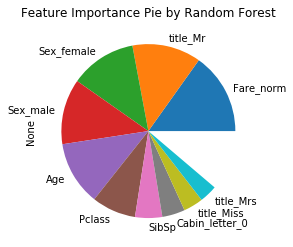

In [203]:
#let's visualize the importance of each factor in random forest model
best_rf = tuned_rf.best_estimator_.fit(x_train_scl,y_train)
feat_rank = pd.Series(best_rf.feature_importances_, index=x_train_scl.columns)
feat_rank.nlargest(10).plot(kind='pie', title='Feature Importance Pie by Random Forest')

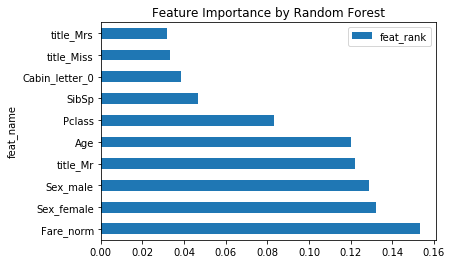

In [201]:
#let's view the value of importance of each factor in random forest model
best_rf = tuned_rf.best_estimator_.fit(x_train_scl,y_train)
df = tuple(zip(x_train_scl.columns,best_rf.feature_importances_))
feat_rank = pd.DataFrame(df, columns=['feat_name','feat_rank'])
feat_rank.nlargest(10,'feat_rank').plot(kind='barh',x='feat_name',y='feat_rank', title='Feature Importance by Random Forest')

In [197]:
#Create submission using random forest 
y_pred_rf = tuned_rf.best_estimator_.predict(x_test_scl)
data_rf = {'PassengerID': test.PassengerId, 'Survived': y_pred_rf}
submission_rf = pd.DataFrame(data=data_rf)
submission_rf.to_csv('rf_submission.csv', index=False)

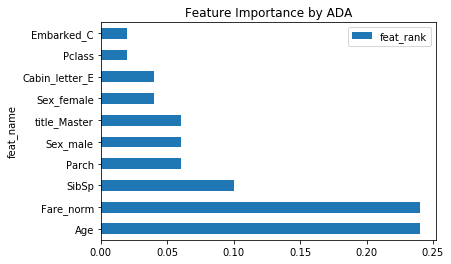

In [200]:
#let's visualize the importance of each factor in adaboost model in copmarison
best_ada = tuned_ada.best_estimator_.fit(x_train_scl,y_train)
df = tuple(zip(x_train_scl.columns,best_ada.feature_importances_))
feat_rank = pd.DataFrame(df, columns=['feat_name','feat_rank'])
feat_rank.nlargest(10,'feat_rank').plot(kind='barh',x='feat_name',y='feat_rank', title='Feature Importance by ADA')

In [204]:
#Create submission using Adaboost 
y_pred_ada = tuned_ada.best_estimator_.predict(x_test_scl)
data_ada = {'PassengerID': test.PassengerId, 'Survived': y_pred_ada}
submission_ada = pd.DataFrame(data=data_ada)
submission_ada.to_csv('ada_submission.csv', index=False)

In [205]:
#Lastly, let's see if we can improve performance with a Hard and Soft Vote Ensemble

In [206]:
#create best models
best_lr = tuned_lr.best_estimator_
best_rf = tuned_rf.best_estimator_
best_kn = tuned_kn.best_estimator_
best_svc = tuned_svc.best_estimator_
best_ada = tuned_ada.best_estimator_
best_xgb = tuned_xgb.best_estimator_

In [207]:
#Hard Voting Ensemble

start_time = time.time()

hard_vote = VotingClassifier(estimators=[('xgb',best_xgb), ('ada',best_ada), ('rf',best_rf),('svc',best_svc), ('kn',best_kn), ('lr',best_lr)], voting='hard')
score_vote = cv_score(hard_vote, x_train_scl, y_train,cv=10)

run_time = (time.time() - start_time)

print(score_vote.round(2)*100) 
print("Voting Classifier Accuracy: %s" % round(score_vote.mean()*100,2)) 
print("Run time: %s" % datetime.timedelta(seconds=run_time))

[81. 87. 76. 89. 88. 82. 85. 79. 90. 83.]
Voting Classifier Accuracy: 83.91
Run time: 0:00:09.406840


In [208]:
#Soft Voting Ensemble

start_time = time.time()

soft_vote = VotingClassifier(estimators=[('xgb',best_xgb), ('ada',best_ada), ('rf',best_rf),('svc',best_svc), ('kn',best_kn), ('lr',best_lr)], voting='soft')
score_vote = cv_score(soft_vote, x_train_scl, y_train,cv=10)

run_time = (time.time() - start_time)

print(score_vote.round(2)*100) 
print("Voting Classifier Accuracy: %s" % round(score_vote.mean()*100,2)) 
print("Run time: %s" % datetime.timedelta(seconds=run_time))

[81. 87. 78. 89. 85. 81. 84. 79. 89. 85.]
Voting Classifier Accuracy: 83.69
Run time: 0:00:10.129907


In [209]:
#7. Solution Submission | Supply or submit the results.

In [210]:
#Create final submissions using hard and soft ensembles | Hard Voting Ensemble
hard_vote.fit(x_train_scl, y_train)
y_pred_hardvote = hard_vote.predict(x_test_scl)
submission_hardvote = {'PassengerID': test.PassengerId, 'Survived': y_pred_hardvote}
submission_hv = pd.DataFrame(data=submission_hardvote)
submission_hv.to_csv('hardvote_submission.csv', index=False)

In [211]:
#Create final submissions using hard and soft ensembles | Soft Voting Ensemble
soft_vote.fit(x_train_scl, y_train)
y_pred_softvote = soft_vote.predict(x_test_scl)
submission_softvote = {'PassengerID': test.PassengerId, 'Survived': y_pred_softvote}
submission_sv = pd.DataFrame(data=submission_softvote)
submission_sv.to_csv('softvote_submission.csv', index=False)

In [212]:
#let's compare the outputs of all our submissions
all_subs = {'PassengerID': test.PassengerId, 'Survived_hv': y_pred_hardvote,'Survived_sv': y_pred_softvote,
           'Survived_ada': y_pred_ada, 'Survived_rf': y_pred_rf, 'Survived_xgb': y_pred_xgb, 
            'Survived_baseline': y_pred_hardvote}

df_allsubs = pd.DataFrame(data=all_subs)

In [213]:
df_allsubs['diff_baseline_other'] = df_allsubs.apply(lambda x: 1 if x.Survived_baseline != x.Survived_rf else 0, axis=1)
df_allsubs['diff_baseline_other'].value_counts()

0    400
1     18
Name: diff_baseline_other, dtype: int64